### Zadanie 1

Zaimplementuj generator liniowy kongruentny wg wzoru:
$$X_{i+1}=(aX_i+c)\ mod\ m$$
Generator ma zwracać wartości w zakresie [0...1], wartości startowe wg własnego wyboru. 
 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
arr = []


def rand(a, c, m, x0):
    return (a*x0 + c) % m


def rand_n_numbers(a, c, m, x0, n):
    arr = []
    for _ in range(n):
        x0 = rand(a, c, m, x0)
        arr.append(x0/m)
    return arr


Przetestuj jego działanie dla różnych zestawów parametrów:

|     a         |   c           | m         |
| ------------- |:-------------:| ---------:|
|  1103515245   | 12345         |$$2^{32}$$ |
| 1229          | 1             | $$2048$$  |
| 1597          | 51749         | $$24494$$ |
| $2^{16}+3$    | 0             | $ 2^{31}$ |



Losowanie 20 liczb dla a = 1103515245, c = 12345, m = $2^{32}$, x0 = 1000 :


In [2]:
tmp_arr = rand_n_numbers(1103515245, 12345, 2**32, 1000, 20)
arr += tmp_arr
print(tmp_arr)

[0.9321676495019346, 0.12120441487058997, 0.5710036100354046, 0.6241067992523313, 0.48310501803644, 0.33921439619734883, 0.5272473401855677, 0.7804780006408691, 0.09432174102403224, 0.15496435714885592, 0.5453901214059442, 0.4438631637021899, 0.8393000934738666, 0.27833965653553605, 0.27503079059533775, 0.2663607057183981, 0.4292138481978327, 0.8514270386658609, 0.17298482893966138, 0.88863639626652]


Losowanie 20 liczb dla a = 1229, c = 1, m = 2048, x0 = 1000 :

In [3]:
tmp_arr = rand_n_numbers(1229, 1, 2048, 1000, 20)
arr += tmp_arr
print(tmp_arr)

[0.09814453125, 0.6201171875, 0.12451171875, 0.025390625, 0.20556640625, 0.6416015625, 0.52880859375, 0.90625, 0.78173828125, 0.7568359375, 0.15185546875, 0.630859375, 0.32666015625, 0.4658203125, 0.49365234375, 0.69921875, 0.34033203125, 0.2685546875, 0.05419921875, 0.611328125]


Losowanie 20 liczb dla a = 1597, c = 51749, m = 24494, x0 = *1000* :

In [4]:
tmp_arr = rand_n_numbers(1597, 51749, 24494, 1000, 20)
arr += tmp_arr
print(tmp_arr)

[0.31236221115375196, 0.9551726953539642, 0.5235159630930024, 0.16771454233689884, 0.9528455948395526, 0.8071364415775292, 0.10961868212623499, 0.1737568384094064, 0.6023924226341145, 0.13342042949293706, 0.1851473830325794, 0.7930921858414306, 0.6809422715767126, 0.5775291908222422, 0.42683922593288154, 0.7749652976239079, 0.7323017881930268, 0.5986772270760187, 0.20025312321384828, 0.9169592553278354]


Losowanie 20 liczb dla a = $2^{16}+3$, c = 0, m = $2^{31}$, x0 = 1000 :

In [5]:
tmp_arr = rand_n_numbers(2**16+3, 0, 2**31, 1000, 20)
arr += tmp_arr
print(tmp_arr)

[0.030518975108861923, 0.18310965970158577, 0.8239871822297573, 0.2959361560642719, 0.3597322963178158, 0.49496837332844734, 0.732219573110342, 0.9386020787060261, 0.04163631424307823, 0.8023991771042347, 0.4396682344377041, 0.41641681268811226, 0.5414867661893368, 0.5011692829430103, 0.133634801954031, 0.29128526523709297, 0.5449983738362789, 0.6484228558838367, 0.9855517707765102, 0.07750492170453072]


Zwizualizuj rozkład generowanych liczby (histogram lub lepiej chmura punktów 2-D lub 3D ($X_i, X_{i+1}$), ($X_i, X_{i+1}, X_{i+2}$)). Oceń jakość generowanych rozkładów.

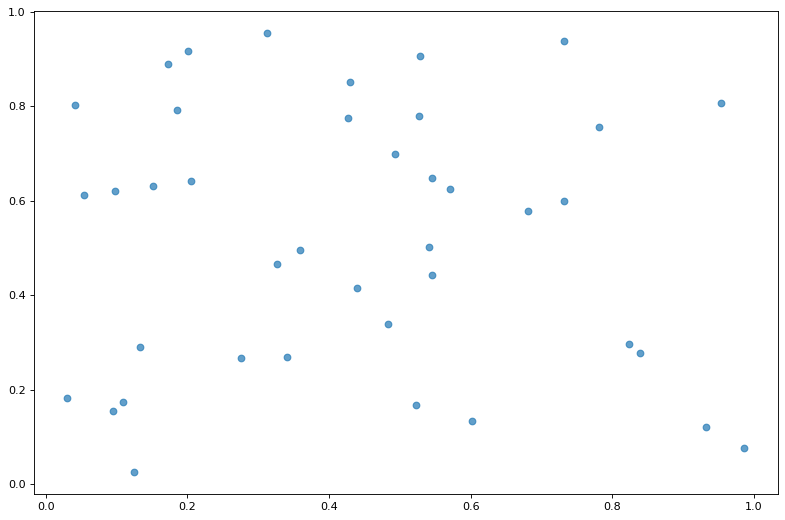

In [6]:
x = [arr[i] for i in range(len(arr)) if i % 2 == 0]
y = [arr[i] for i in range(len(arr)) if i % 2 == 1]

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x, y, alpha=0.7,cmap='viridis')
plt.show()

Widzimy, że generowany rozkład przez nasz generator nie jest najlepszy, odrazu widać, że powstają liczne korelacje sekwencji (patrz rysunek poniżej:                                   
![alt text](https://drive.google.com/uc?id=1ko_bU89FYmwVNRhPAYJRd5DKvBo_0Q7F)

### Zadanie 2
Zapoznaj się z generetorem dostępnym w bibliotece numpy. Opisz krótko jaki to generator i jak działa. Przeanalizuj generowany przez niego rozkład podobnie jak w poprzednim zadaniu. 

Biblioteka numpy używa generatora o nazwie Mersenne Twister, dzięki któremu możliwe jest uzyskanie liczb zmiennoprzecinkowych o 53-bitowej precyzji, przy czym okres tego generatora wynosi 2**19937-1. Implementacja w języku C, na której generator ów bazuje, jest szybka i bezpieczna ze względu na wątki. Mersenne Twister jest jednym z najszerzej badanych generatorów spośród wszystkich obecnie istniejących.Generator oparty został na liniowej rekurencji macierzowej w skończonej dziedzinie binarnej. Jednakże, ze względu na fakt, że jest on całkowicie deterministyczny, nie nadaje się do wszystkich celów, a w szczególności nie nadaje się do celów kryptograficznych.

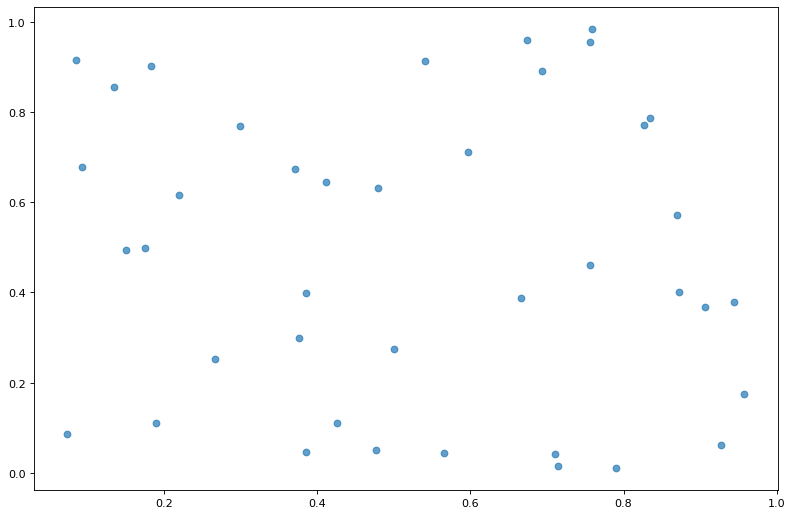

In [9]:
arr = [np.random.random() for _ in range(80)]
x = [arr[i] for i in range(len(arr)) if i % 2 == 0]
y = [arr[i] for i in range(len(arr)) if i % 2 == 1]

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x, y, alpha=0.7,cmap='viridis')
plt.show()

Widzimy że przy użyciu generatora z biblioteki numpy ten rozkład wyszedł nam bardziej losow jest mniej korelacji sekwencji.

### Zadanie 3
Zaimplementuj metodą całkowania Monte Carlo i zastosuj ją wobec następujących całek:
$$ \int_1^2 \frac{1}{x^2}\ dx $$
$$ \int_1^6 \frac{1}{\sqrt{x^5+8}}\ dx $$
$$ \int_1^{22} x^2+2x\ dx $$


In [0]:
def monte_carlo(fun, a, b, N):
    xrand = [np.random.uniform(a, b) for _ in range(N)]
    result = 0.0
    for i in range(N):
        result += fun(xrand[i])
    return (b-a)/float(N)*result


f1 = lambda x: 1 / (x**2)
f2 = lambda x: 1 / np.sqrt(x**5+8)
f3 = lambda x: x**2 + 2*x

Obliczenie wartości powyższych całek dla trzech róznych liczby próbek 500, 1000, 10000:
$$ \int_1^2 \frac{1}{x^2}\ dx = 0.5$$


In [14]:
print(monte_carlo(f1, 1, 2, 500))
print(monte_carlo(f1, 1, 2, 1000))
print(monte_carlo(f1, 1, 2, 10000))

0.5193846467057053
0.5013118586985801
0.4991616313665345


$$ \int_1^6 \frac{1}{\sqrt{x^5+8}}\ dx = 0.435059720011$$

In [17]:
print(monte_carlo(f2, 1, 6, 500))
print(monte_carlo(f2, 1, 6, 1000))
print(monte_carlo(f2, 1, 6, 10000))

0.42354020647047214
0.44883391230093483
0.42745876722150195


$$ \int_1^{22} x^2+2x\ dx = 4032$$

In [19]:
print(monte_carlo(f3, 1, 22, 500))
print(monte_carlo(f3, 1, 22, 1000))
print(monte_carlo(f3, 1, 22, 10000))

3833.9644785022565
4001.4913975290765
4034.391803667369


# Oblicz także objętości brył:
- kula o promioniu 5
- stożek o wysokości 10 i promieniu podstawy 10
- bryła będąca różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3; środek walca pokrywa się z środkiem kuli.

Przeanalizuj jak wybór liczby próbek wpływa na wyniki obliczeń. 

#### Zadanie dodatkowe
Zastosuj do obliczeń własny generator kongruentny (w domyśle ten z gorszym rozkładem) i porównaj z generatorem.  

Rozwiązując te zadanie wykorzystam fakt, że :

$\frac{n}{N} = \frac{V1}{V2}$, gdzie :     
n - jest to ilość punktów wylosowanych, które wspołrzędne zawierają się w figurze, dla której liczymy objętości,         
N - jest to ilość punktów wylosowanych, dla takiego sześcianu który ogranicza figurę dla której chcemy policzyć objętości,       
V1 - szukana objętości figury,           
V2 - objętości ograniczającego sześcianu, to można łatwo policzyć.

In [0]:
def plot_3d(x, y, z, c):
    fig = plt.figure(figsize=(12, 8), dpi=80)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=c)
    plt.show()

w celu lepszego zobrazowania jak ta metoda losuje punkty rysuje odpowiednie wykresy 3D. 

Objętość kuli o promieniu 5 :     
warunek żeby punkt zawierał się w kuli o promieniu R to $x^{2} + y^{2} + z^{2} \leq R^{2}$ 

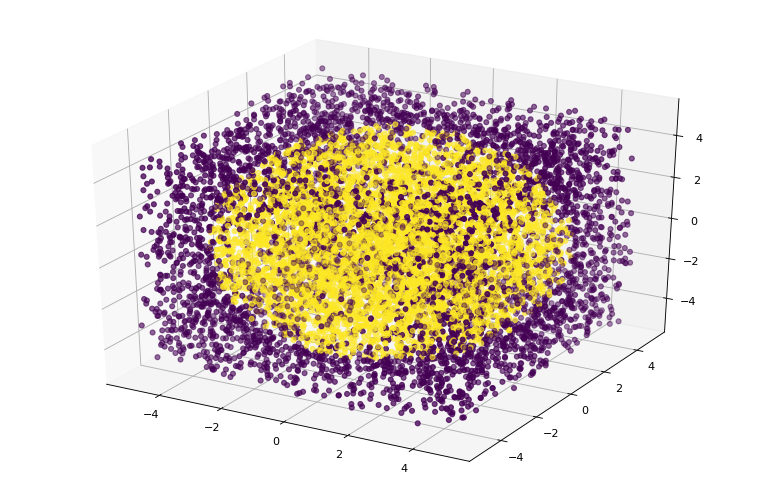

Objętości kuli o promieniu 5 oraz ilości próbek 10000 wynosi około : 516.1


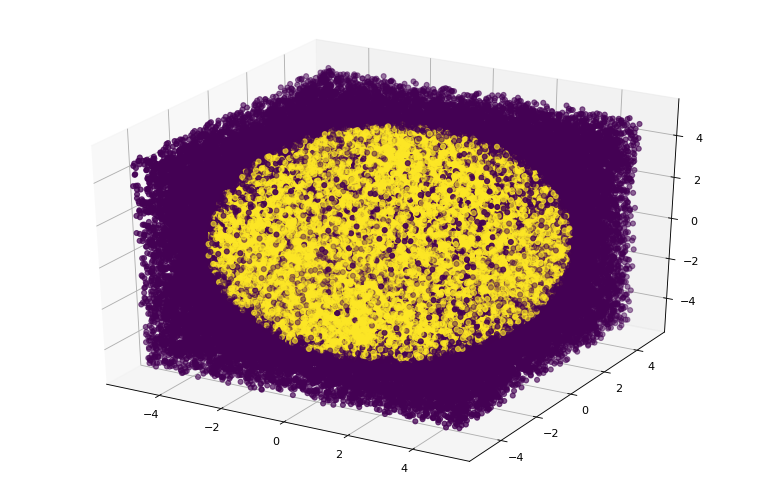

Objętości kuli o promieniu 5 oraz ilości próbek 100000 wynosi około : 525.3100000000001


In [38]:
def is_in_sphere(x, y, z, R):
    return x ** 2 + y ** 2 + z ** 2 <= R ** 2


def sphere_volume(R, N):
    colors = []
    points = []
    counter = 0
    for _ in range(N):
        point = np.random.uniform(-R, R), np.random.uniform(-R, R), np.random.uniform(-R, R)
        points.append(point)
        if is_in_sphere(*point, R):
            colors.append(1)
            counter += 1
        else:
            colors.append(0)
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    z = [point[2] for point in points]
    plot_3d(x, y, z, colors)
    return (counter / N) * ((2 * R) ** 3)


print("Objętości kuli o promieniu 5 oraz ilości próbek 10000 wynosi około : {}".format(sphere_volume(5, 10000)))
print("Objętości kuli o promieniu 5 oraz ilości próbek 100000 wynosi około : {}".format(sphere_volume(5, 100000)))

Dokładna objętości kuli wynosi :  523.59877

Objętość stożka o wysokości 10 i promieniu podstawy 10 :   
warunek żeby punkt zawierał się w stożku o promieniu R i wysokości h to $x^{2} + y^{2} \leq (\frac{z*R}{h})^{2}$          

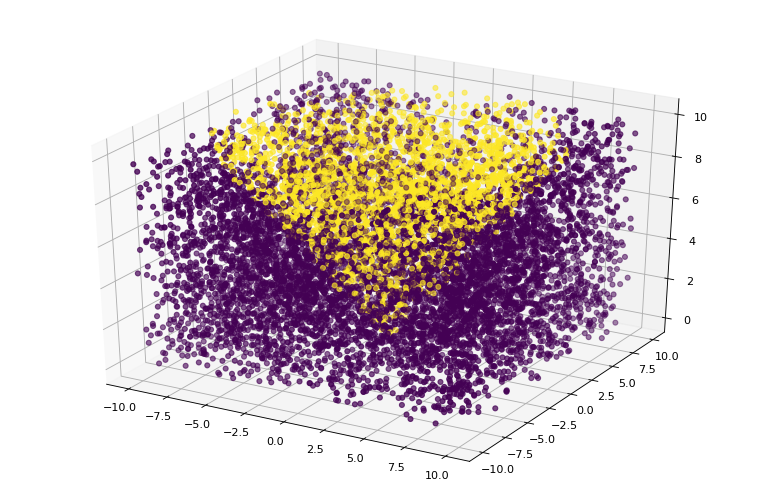

Objętości stożka o promieniu 10, wysokości 10 oraz ilości próbek 10000 wynosi około : 1078.4


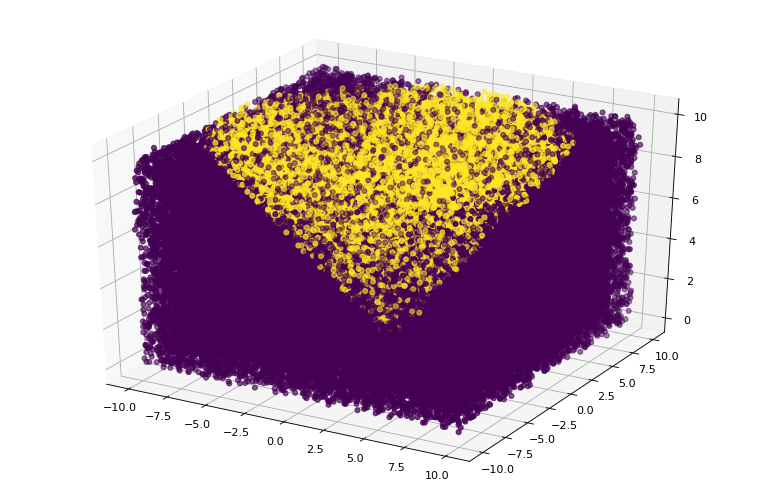

Objętości stożka o promieniu 10, wysokości 10 oraz ilości próbek 100000 wynosi około : 1048.4


In [39]:
def is_in_cone(x, y, z, R, h):
    return x ** 2 + y ** 2 <= ((z*R)/h) ** 2


def cone_volume(R, h, N):
    colors = []
    points = []
    counter = 0
    for _ in range(N):
        point = np.random.uniform(-R, R), np.random.uniform(-R, R), np.random.uniform(0, h)
        points.append(point)
        if is_in_cone(*point, R, h):
            colors.append(1)
            counter += 1
        else:
            colors.append(0)
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    z = [point[2] for point in points]
    plot_3d(x, y, z, colors)
    return (counter / N) * (h * (2 * R) ** 2)


print("Objętości stożka o promieniu 10, wysokości 10 oraz ilości próbek 10000 wynosi około : {}".format(cone_volume(10, 10, 10000)))
print("Objętości stożka o promieniu 10, wysokości 10 oraz ilości próbek 100000 wynosi około : {}".format(cone_volume(10, 10, 100000)))

Dokładna objętości stożka wynosi : 1047,197551197 

Objętości bryły będącej różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3; środek walca pokrywa się z środkiem kuli.   
Czyli losowane punkty muszą zawierać się w kuli ale nie mogą zawierać się w walcu, warunek na to jest następujący :                  
$x^{2} + y^{2} + z^{2} \leq R_{kuli}^{2}$ and $x^{2} + y^{2}$ !$\leq R_{walca}^{2} $ and $-\frac{h}{2}$ !$\leq  z$ !$\leq \frac{h}{2}$ 

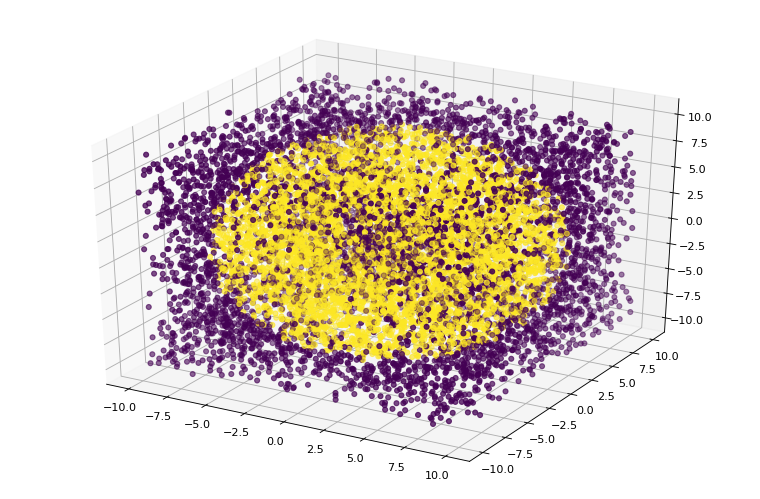

Objętości bryły będącej różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3 oraz ilości próbek 10000 wynosi około : 4048.0


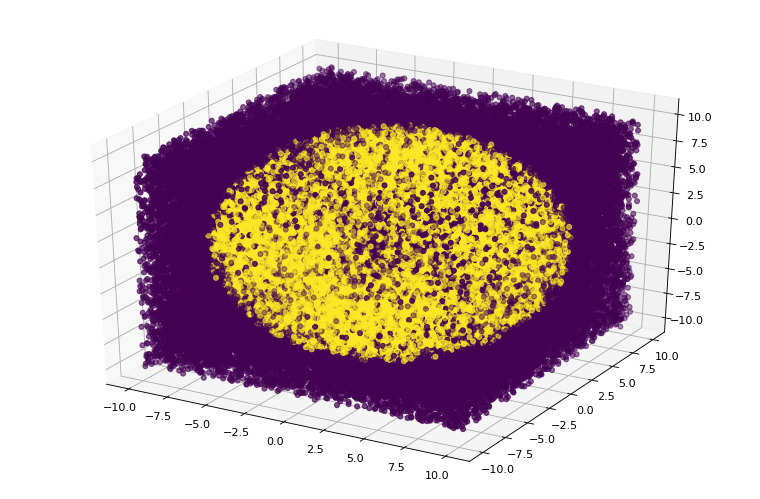

Objętości bryły będącej różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3 oraz ilości próbek 100000 wynosi około : 4031.44


In [51]:
def is_in_sphere(x, y, z, R):
    return x ** 2 + y ** 2 + z ** 2 <= R ** 2


def is_in_roller(x, y, z, R, h):
    return (x ** 2 + y ** 2 <= R ** 2) and (z <= h/2) and (z >= -h/2)


def block_volume(R_kuli, R_walca, h, N):
    colors = []
    points = []
    counter = 0
    for _ in range(N):
        point = np.random.uniform(-R_kuli, R_kuli), np.random.uniform(-R_kuli, R_kuli), np.random.uniform(-R_kuli, R_kuli)
        points.append(point)
        if not is_in_roller(*point, R_walca, h) and is_in_sphere(*point, R_kuli):
            colors.append(1)
            counter += 1
        else:
            colors.append(0)
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    z = [point[2] for point in points]
    plot_3d(x, y, z, colors)
    return (counter / N) * (((2 * R_kuli) ** 3))


print("Objętości bryły będącej różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3 oraz ilości próbek 10000 wynosi około : {}".format(block_volume(10, 3, 6, 10000)))
print("Objętości bryły będącej różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3 oraz ilości próbek 100000 wynosi około : {}".format(block_volume(10, 3, 6, 100000)))

Dokładna objętości powyższej figury wynosi : 4188,790204786 - 169,646003294 = 4019,144201492

Widzimy im większa liczba próbek to bardziej dokładny wynik nam wychodzi.